## Classification with SVM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import svm, datasets, metrics, model_selection, preprocessing, pipeline

Load the data set

In [2]:
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

Stratify the data by the target label

train samples: 89
test samples 89


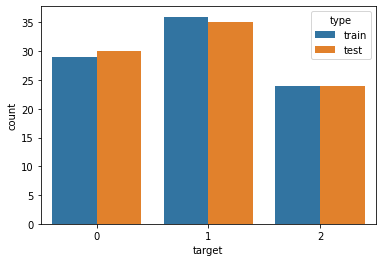

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.5, stratify=y)

df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.countplot(x='target', hue='type', data=df_set)     

print('train samples:', len(X_train))
print('test samples', len(X_test))

In [5]:
# ovr -> one-vs-rest
model = pipeline.make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='rbf', degree=3, decision_function_shape='ovr', class_weight='balanced'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [6]:
predicted = model.predict(X_test)

truth_table = pd.DataFrame(predicted, columns=['target_predicted'])
truth_table['target_truth'] = y_test

truth_table = truth_table.groupby(['target_predicted', 'target_truth']).size().unstack().fillna(0)

truth_table

target_truth,0,1,2
target_predicted,,,
0,29.0,0.0,0.0
1,1.0,34.0,0.0
2,0.0,1.0,24.0


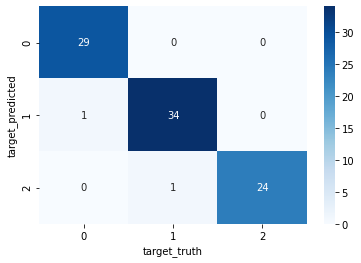

In [7]:
_ = sns.heatmap(truth_table, annot=True, cmap="Blues")

In [8]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, predicted)))
print("precision: {:.3f}".format(metrics.precision_score(y_test, predicted, average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(y_test, predicted, average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(y_test, predicted, average='weighted')))

accuracy: 0.978
precision: 0.978
recall: 0.978
f1 score: 0.978
